# Chapter 12 : 물리계 최적화하기

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from math import sin, cos, pi

def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

## 12.1 포물선 운동 시뮬레이션 테스트하기

### 12.1.1 오일러 방법으로 시뮬레이션 만들기

In [45]:
def trajectory(theta, speed=20, height=0, dt=0.01, g=-9.81): # 타임스텝 dt, 중력장 강도 g, 각도 theta(도 단위)
    vx = 20 * cos(pi * theta / 180) # 입력 각도를 도에서 라디안으로 바꾼 뒤, 속도의 초기 x성분과 z성분을 계산한다.
    vz = 20 * sin(pi * theta / 180)
    t, x, z = 0, 0, height
    ts, xs, zs = [t], [x], [z] # 시뮬레이션하는 동안 모든 시간, x위치, z위치 값을 저장하는 리스트를 초기화한다.
    while z >= 0:
        t += dt # 시간, z속도, 위치를 갱신함. x방향으로 작용하는 힘이 없어지므로, x속도는 변경하지 않는다.
        vz += g * dt
        x += vx * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        zs.append(z)
    return ts, xs, zs

In [58]:
# trajectory함수를 실행한 출력 결과를 하나 이상 입력으로 주면 각 포탄의 경로를 나타내는 곡선을 그린다.
def plot_trajectories(*trajs,show_seconds=False):
    for traj in trajs:
        xs, zs = traj[1], traj[2]
        plt.plot(xs,zs)
        if show_seconds:
            second_indices = []
            second = 0
            for i,t in enumerate(traj[0]):
                if t>= second:
                    second_indices.append(i)
                    second += 1
            plt.scatter([xs[i] for i in second_indices], [zs[i] for i in second_indices])
    xl = plt.xlim()
    plt.xlabel('높이')
    plt.ylabel('거리')
    plt.plot(plt.xlim(),[0,0],c='k')
    plt.xlim(*xl)
    
    width = 7
    coords_height = (plt.ylim()[1] - plt.ylim()[0])
    coords_width = (plt.xlim()[1] - plt.xlim()[0])
    plt.gcf().set_size_inches(width , width * coords_height / coords_width)

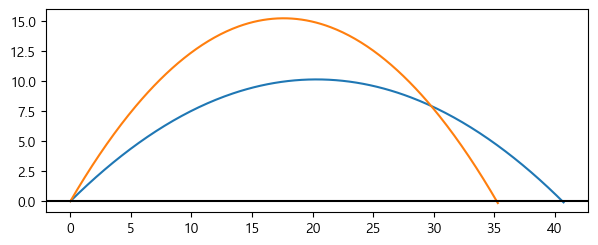

In [47]:
plot_trajectories(trajectory(45), trajectory(60))

### 12.1.2 궤적의 특성 측정하기

In [53]:
def landing_position(traj):
    return traj[1][-1] # 척도를 계산하는 함수, traj[1] : x좌표의 리스트, traj[1][-1] : 리스트의 마지막 성분

def hang_time(traj):
    return traj[0][-1] # 체공 시간, 즉 발사체가 지면에 닿을 때의 시계에 표시된 시간은 마지막 시간값과 같다.

def max_height(traj):
    return max(traj[2]) # 최대 높이 z위치 중 최댓값인데, z위치의 리스트는 궤적 출력 결과 중 세 번째 리스트에 해당한다.

### 12.1.3 서로 다른 발사각 살펴보기

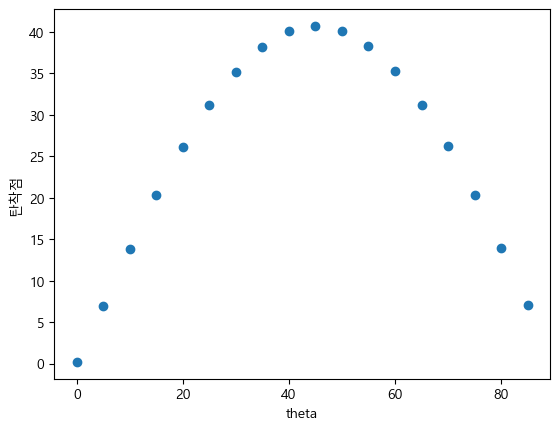

In [49]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline
angles = range(0, 90, 5)
landing_position = [landing_position(trajectory(theta)) for theta in angles]
plt.xlabel('theta')
plt.ylabel('탄착점')
plt.scatter(angles, landing_position)

### 12.1.4 연습문제

12.1 초기 높이 0에서 50도 각도로 대포를 발사했을 때, 대포의 도달거리를 구하라. 발사각도가 130도 일 때 발사할 경우 대포의 도달거리를 구하라.

In [54]:
landing_position(trajectory(50))

40.10994684444007

In [56]:
landing_position(trajectory(130))

-40.10994684444007

12.2 1초가 지날 때마다 궤적 그래프에 큰 점을 그리도록 plot_trajectories 함수를 개선하라. 이를 통해 플롯에서 시간이 얼마나 흘렀는지 관찰할 수 있다.

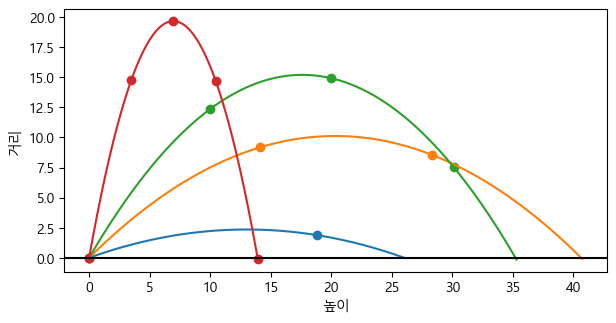

In [59]:
plot_trajectories(trajectory(20), trajectory(45), trajectory(60), trajectory(80), show_seconds=True)

12.3 각이 0도와 180도 사이일 때 발사 각도 대 체공 시간에 대한 산점도를 그려라. 체공 시간이 최대가 되는 발사 각도를 구하라.

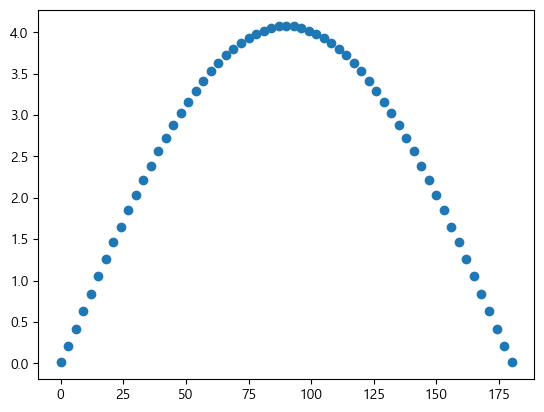

In [63]:
test_angles = range(0, 181, 3)
hang_times = [hang_time(trajectory(theta)) for theta in test_angles]
plt.scatter(test_angles, hang_times)

12.4 주어진 theta값 집합에 대해 임의의 척도를 계산한 결과를 플로팅해주는 함수 plot_trajectory_metric을 작성하라.

In [64]:
def plot_trajectory_metric(metric, thetas, **settings):
    plt.scatter(thetas, [metric(trajectory(theta, **settings)) for theta in thetas])

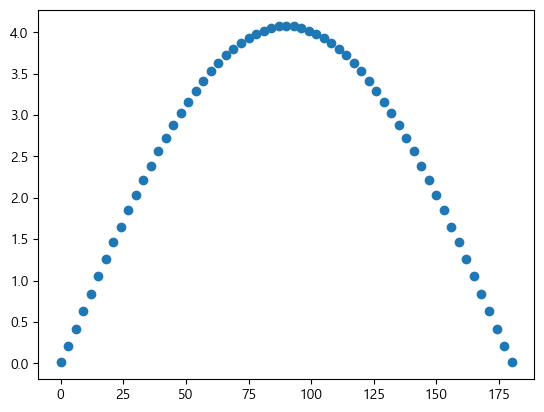

In [65]:
plot_trajectory_metric(hang_time, range(0, 181, 3))

12.5 초기 발사 높이가 10m일 때 포탄의 사거리가 가장 커지는 발사 각도의 근삿값을 구하라.

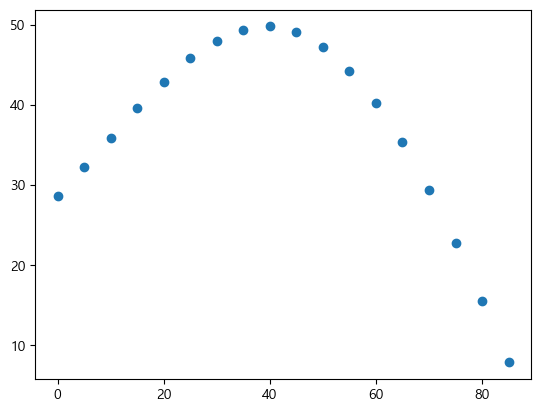

In [66]:
plot_trajectory_metric(landing_position, range(0,90, 5), height=10)

## 12.2 최적 사거리 계산하기

### 12.2.1 발사각의 함수로 발사체의 사거리 구하기

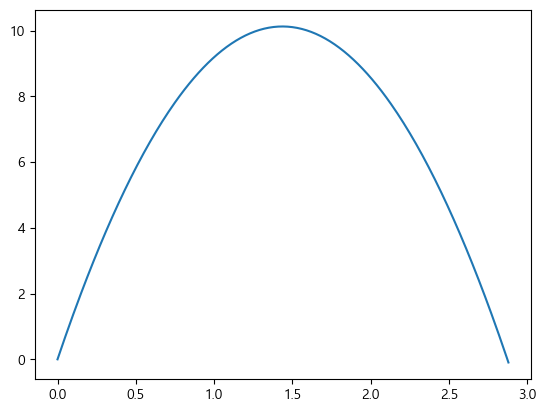

In [67]:
trj = trajectory(45)
ts, zs = trj[0], trj[2]
plt.plot(ts, zs)

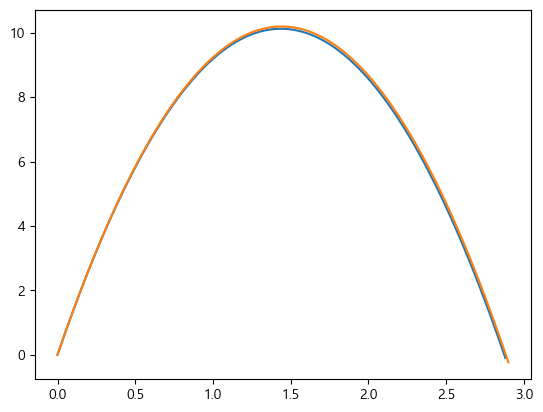

In [70]:
def z(t):
    return 20 * sin(45*pi/180) * t + (-9.81/2) * t ** 2

plt.plot(ts,zs)
plot_function(z, 0, 2.9)

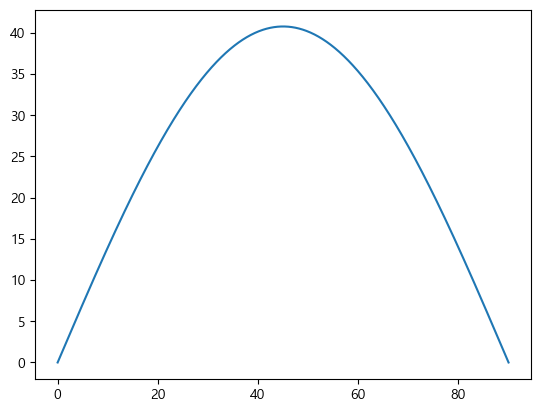

In [72]:
def r(theta):
    return (-2*20*20/-9.81)*sin(theta*pi/180)*cos(theta*pi/180)

plot_function(r,0,90)

### 12.2.2 최대 사거리 구하기

In [74]:
r(45)

40.774719673802245

In [75]:
r(135)

-40.77471967380224

## 12.3 시뮬레이션 개선하기

### 12.3.1 다른 차원 추가하기

In [76]:
def trajectory3d(theta, phi, speed=20, height=0, dt=0.01, g=-9.81):
    vx = speed * cos(pi * theta / 180) * cos(pi * phi / 180)
    vy = speed * cos(pi * theta / 180) * cos(pi * phi / 180) # 초기 y속도를 계산한다.
    vz = speed * sin(pi * theta / 180)
    t, x, y, z = 0, 0, 0, height
    ts, xs, ys, zs = [t], [x], [y], [z]
    while z >= 0:
        t += dt
        vz += g * dt
        x += vx * dt
        y += vy * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, xs, ys, zs

In [100]:
from mpl_toolkits.mplot3d import Axes3D
def plot_trajectory3d(traj):
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(7,7)
    ax = fig.add_subplot(projection='3d')
    ax.plot(traj[1],traj[2],traj[3])

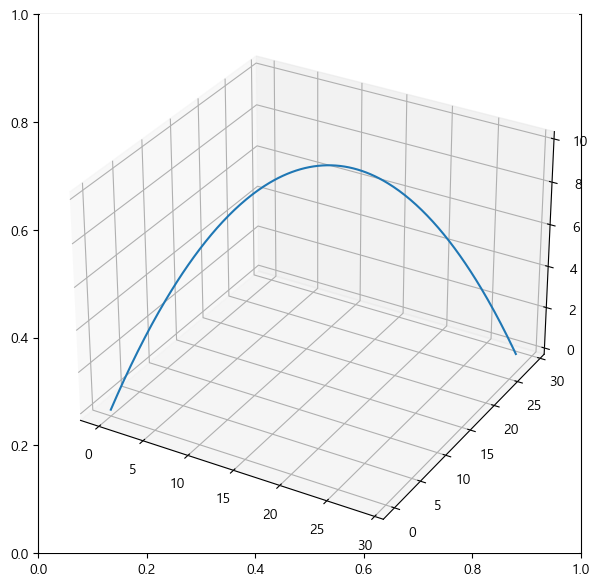

In [101]:
plot_trajectory3d(trajectory3d(45,45))

### 12.3.2 대포 주변의 지형 모델링하기

In [102]:
def flat_ground(x,y):
    return 0

In [103]:
def ridge(x,y):
    return (x**2 - 5*y**2) / 2500

In [104]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81,elevation=flat_ground):
    vx = speed * cos(pi * theta / 180) * cos(pi * phi / 180)
    vy = speed * cos(pi * theta / 180) * sin(pi * phi / 180)
    vz = speed * sin(pi * theta / 180)
    t,x,y,z = 0, 0, 0, height
    ts, xs, ys, zs = [t], [x], [y], [z]
    while z >= elevation(x,y):
        t += dt
        vz += g * dt
        x += vx * dt
        y += vy * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, xs, ys, zs

In [105]:
def plot_trajectories_3d(*trajs,elevation=flat_ground,bounds=None,zbounds=None,shadows=False):
    fig, ax = plt.gcf(), plt.gca(projection='3d')
    fig.set_size_inches(7,7)    

    if not bounds:
        xmin = min([x for traj in trajs for x in traj[1]])
        xmax = max([x for traj in trajs for x in traj[1]])
        ymin = min([x for traj in trajs for x in traj[2]])
        ymax = max([x for traj in trajs for x in traj[2]])

        padding_x = 0.1 * (xmax-xmin)
        padding_y = 0.1 * (ymax-ymin)
        xmin -= padding_x
        xmax += padding_x
        ymin -= padding_y
        ymax += padding_x
    
    else:
        xmin, xmax, ymin, ymax = bounds
    

    plt.plot([xmin,xmax],[0,0],[0,0],c='k')
    plt.plot([0,0],[ymin,ymax],[0,0],c='k')

    g = np.vectorize(elevation)
    ground_x = np.linspace(xmin, xmax, 20)
    ground_y = np.linspace(ymin, ymax, 20)
    ground_x, ground_y = np.meshgrid(ground_x,ground_y)
    ground_z = g(ground_x,ground_y)
    ax.plot_surface(ground_x, ground_y, ground_z, cmap=cm.coolwarm, alpha=0.5,
                       linewidth=0, antialiased=True)
    for traj in trajs:
        ax.plot(traj[1],traj[2],traj[3])
        if shadows:
            ax.plot([traj[1][0],traj[1][-1]],[traj[2][0],traj[2][-1]],[0,0],c='gray',linestyle='dashed')
    
    if zbounds:
        ax.set_zlim(*zbounds)

C:\Users\user\AppData\Local\Temp\ipykernel_15064\3290748045.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig, ax = plt.gcf(), plt.gca(projection='3d')


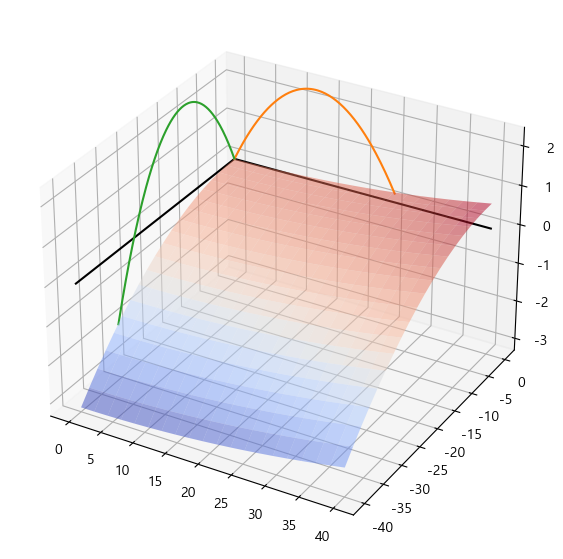

In [106]:
plot_trajectories_3d(
    trajectory3d(20,0,elevation=ridge),
    trajectory3d(20,270,elevation=ridge),
    bounds=[0,40,-40,0],
    elevation=ridge)

### 12.3.3 3차원에서 사거리 수식 구하기

In [108]:
from math import sqrt

B = 0.001 # 능선의 모양, 발사 각도, 중력 가속도에 관한 상수
C = 0.005
v = 20
g = -9.81

def velocity_components(v,theta,phi): # 초기 속도의 x성분, y성분, z성분을 구하는 보조 함수
    vx = v * cos(theta*pi/180) * cos(phi*pi/180)
    vy = v * cos(theta*pi/180) * sin(phi*pi/180)
    vz = v * sin(theta*pi/180)
    return vx,vy,vz
    
def landing_distance(theta,phi):
    vx, vy, vz = velocity_components(v, theta, phi)
    v_xy = sqrt(vx**2 + vy**2) # (xy평면과 평행한) 초기 속도의 수평 성분
    a = (g/2) - B * vx**2 + C * vy**2 # a, b는 상수
    b = vz
    landing_time = -b/a # 착지 시간에 대한 이차방정식에 해 -b/a
    landing_distance = v_xy * landing_time # 수평 이동 거리
    return landing_distance

## 12.4 경사상승법으로 사거리 최적화하기